<a href="https://colab.research.google.com/github/jaekang0/ADS-Catheter-Placement-Group/blob/jae-branch/Catheter_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CATHETER PLACEMENT

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd Catheter Placement

[Errno 2] No such file or directory: 'Catheter Placement'
/content


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

train_data = pd.read_csv('/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train.csv')
train_data

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8


In [5]:
train_anno = pd.read_csv('/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train_annotations.csv')
train_anno.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [29]:
train_data.shape

(30083, 14)

In [30]:
train_anno.shape

(17999, 3)

There are less annotations than actual data



In [33]:
number_of_patients = train_data['PatientID'].value_counts()
number_of_studies = train_data['StudyInstanceUID'].value_counts()
number_of_studies_anno = train_anno['StudyInstanceUID'].value_counts()

print(f"Number of patients in train_data: {len(number_of_patients)}")
print(f"Number of studies in train_data: {len(number_of_studies)}")
print(f"Number of studies in train_anno: {len(number_of_studies_anno)}")

Number of patients in train_data: 3255
Number of studies in train_data: 30083
Number of studies in train_anno: 9095


Not all studies are annotated

# Data Cleaning

Checking for null values:

In [6]:
train_data.isna().sum()

,0
StudyInstanceUID,0
ETT - Abnormal,0
ETT - Borderline,0
ETT - Normal,0
NGT - Abnormal,0
NGT - Borderline,0
NGT - Incompletely Imaged,0
NGT - Normal,0
CVC - Abnormal,0
CVC - Borderline,0


Checking for duplicates

In [7]:
duplicates = train_data.duplicated()
num_duplicates = duplicates.sum()
print(f"Duplicates present: {num_duplicates}")

Duplicates present: 0


# Exploratory Data Analysis

In [8]:
train_data.shape

(30083, 13)

In [9]:
train_data['types_of_catheters'] = train_data[['ETT - Abnormal', 'ETT - Borderline']].sum(axis=1)
train_data

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,types_of_catheters
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,0
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c,0
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,0
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814,0
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,1.2.826.0.1.3680043.8.498.74257566841157531124...,0,0,1,0,0,0,0,0,1,1,0,5b5b9ac30,0
30079,1.2.826.0.1.3680043.8.498.46510939987173529969...,0,0,0,0,0,0,0,0,0,1,0,7192404d8,0
30080,1.2.826.0.1.3680043.8.498.43173270582850645437...,0,0,1,0,0,1,0,1,0,1,0,d4d1b066d,0
30081,1.2.826.0.1.3680043.8.498.95092491950130838685...,0,0,0,0,0,0,0,0,1,0,0,01a6602b8,0


Meaning of each variables:

StudyInstanceUID : unique ID for each image

ETT - Abnormal : endotracheal tube placement abnormal

ETT - Borderline : endotracheal tube placement borderline abnormal

ETT - Normal : endotracheal tube placement normal

NGT - Abnormal : nasogastric tube placement abnormal

NGT - Borderline : nasogastric tube placement borderline abnormal

NGT - Incompletely Imaged : nasogastric tube placement inconclusive due to imaging

NGT - Normal : nasogastric tube placement borderline normal

CVC - Abnormal : central venous catheter placement abnormal

CVC - Borderline : central venous catheter placement borderline abnormal

CVC - Normal : central venous catheter placement normal

Swan Ganz Catheter Present

PatientID : unique ID for each patient in the dataset

### Distribution of Catheter Types

In [10]:
sums_of_catheters = train_data[['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']].sum()
sums_of_catheters

,0
ETT - Abnormal,79
ETT - Borderline,1138
ETT - Normal,7240
NGT - Abnormal,279
NGT - Borderline,529
NGT - Incompletely Imaged,2748
NGT - Normal,4797
CVC - Abnormal,3195
CVC - Borderline,8460
CVC - Normal,21324


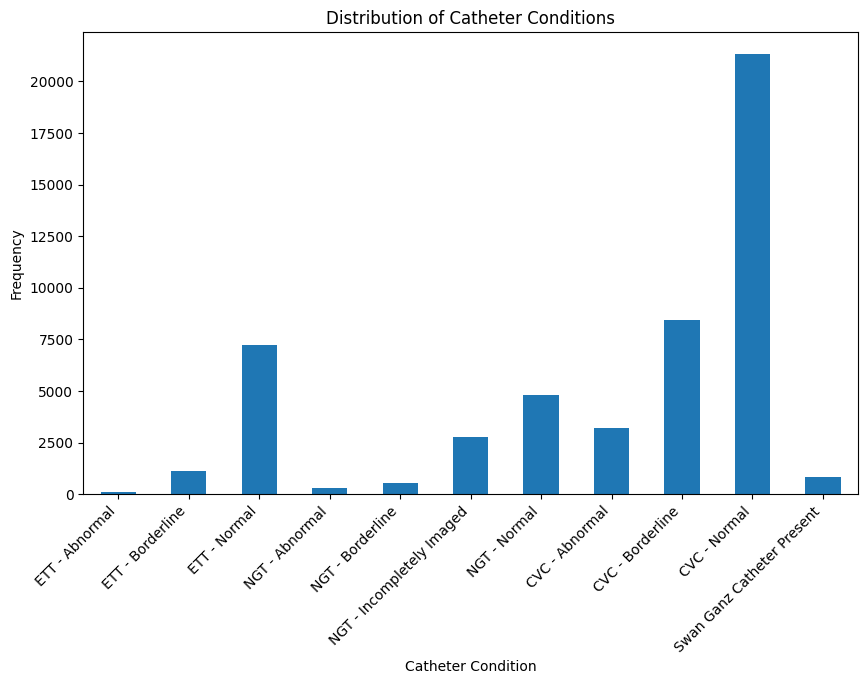

In [11]:
catheter_columns = ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
                   'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
                   'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline',
                   'CVC - Normal', 'Swan Ganz Catheter Present']

sums_of_catheters = train_data[catheter_columns].sum()
sums_of_catheters.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Catheter Conditions')
plt.xlabel('Catheter Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [12]:
print("Number of unique patients: ", train_data["PatientID"].unique().shape[0])

Number of unique patients:  3255


## Correlation Analysis

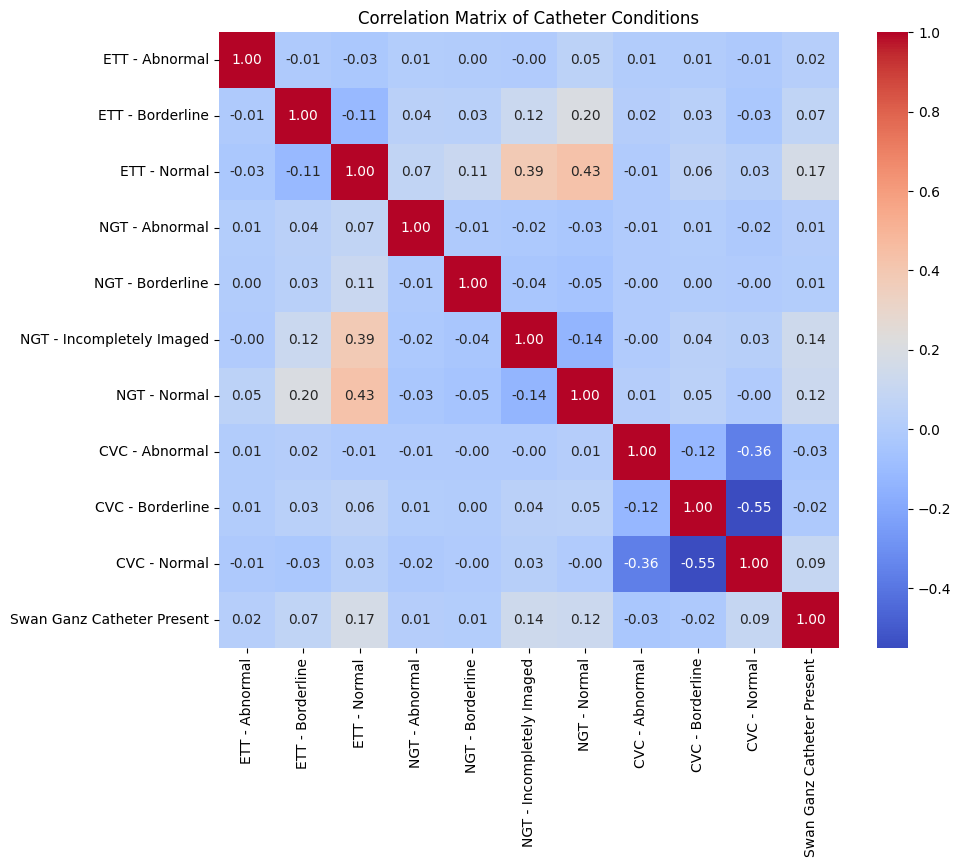

In [13]:
corr_matrix = train_data[catheter_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Catheter Conditions')
plt.show()


## PatientID Analysis

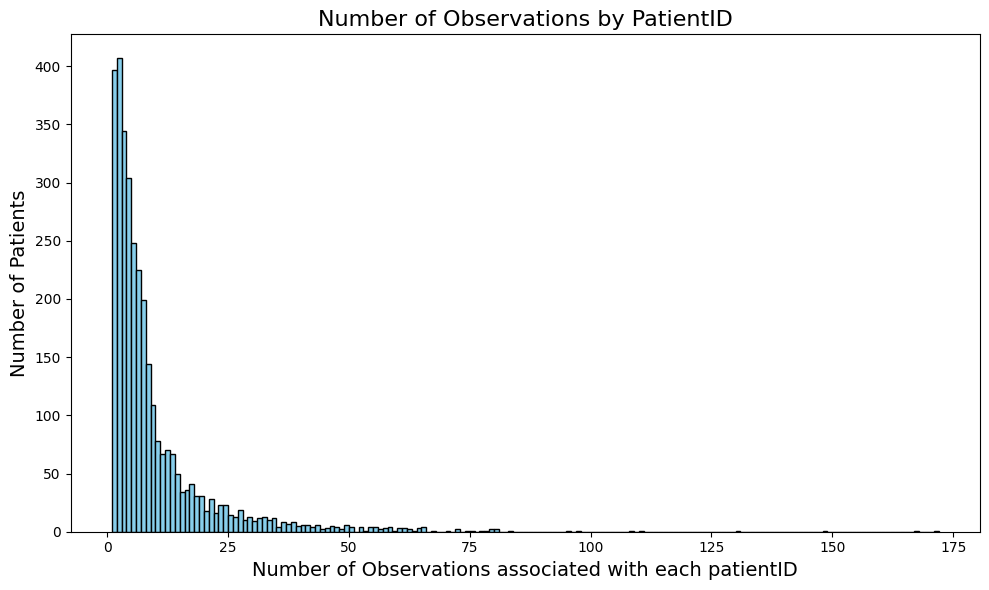

In [14]:
# Count the number of observations per PatientID
observations_per_patient = train_data['PatientID'].value_counts()

# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(observations_per_patient, bins=range(1, observations_per_patient.max() + 1), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Number of Observations by PatientID', fontsize=16)
plt.xlabel('Number of Observations associated with each patientID', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

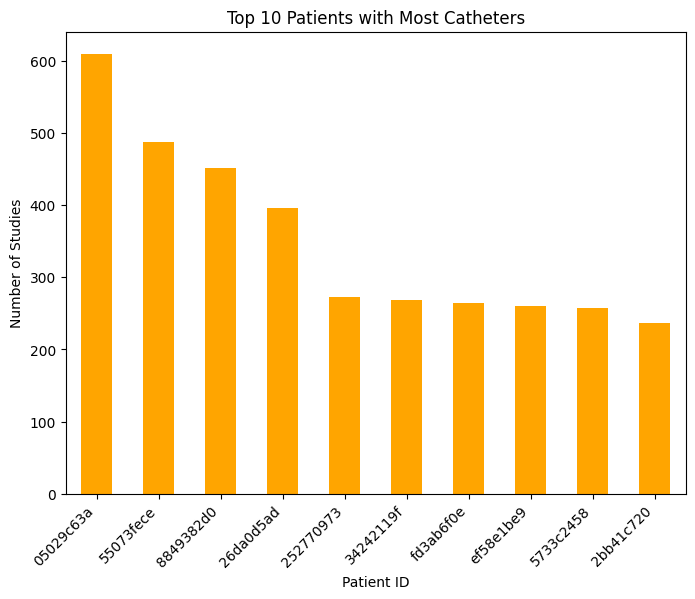

In [34]:
patient_summary = train_data.groupby('PatientID')[['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
                                                   'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
                                                   'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline',
                                                   'CVC - Normal', 'Swan Ganz Catheter Present']].sum()

top_patients = patient_summary.sum(axis=1).sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_patients.plot(kind='bar', color='orange')
plt.title('Top 10 Patients with Most Catheters')
plt.xlabel('Patient ID')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45, ha='right')
plt.show()



## Image Analysis

In [22]:
pip install opencv-python


For this segment, I will graph the location of the catheters from the top 5 patients with the most catheters

In [16]:
# Get the top 5 patients with the most catheters
top_5_patient_ids = patient_summary.sum(axis=1).sort_values(ascending=False).head(5)
top_5_patient_ids = top_5_patient_ids.index.tolist()
print("Top 5 patients with the most catheters:", top_5_patient_ids)

Top 5 patients with the most catheters: ['05029c63a', '55073fece', '8849382d0', '26da0d5ad', '252770973']


In [17]:
# Filter train_data to get the StudyInstanceUIDs for the top 5 patients
top_5_studies = train_data[train_data['PatientID'].isin(top_5_patient_ids)]['StudyInstanceUID'].unique()

# Ensure that the StudyInstanceUIDs match exactly
top_5_annotations = train_anno[train_anno['StudyInstanceUID'].isin(top_5_studies)]



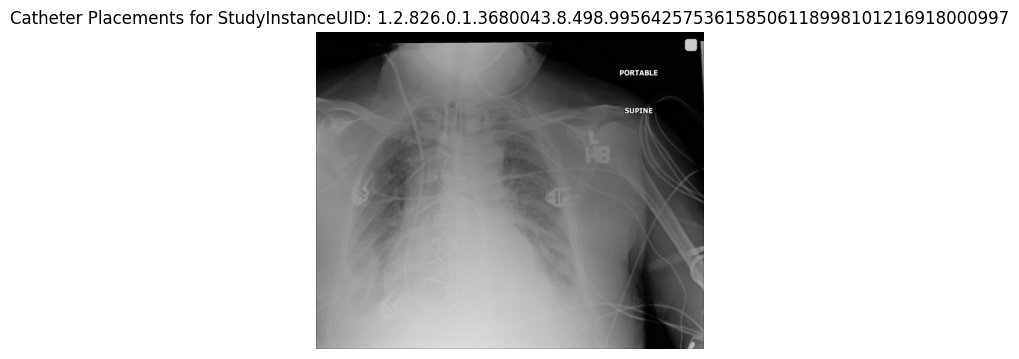

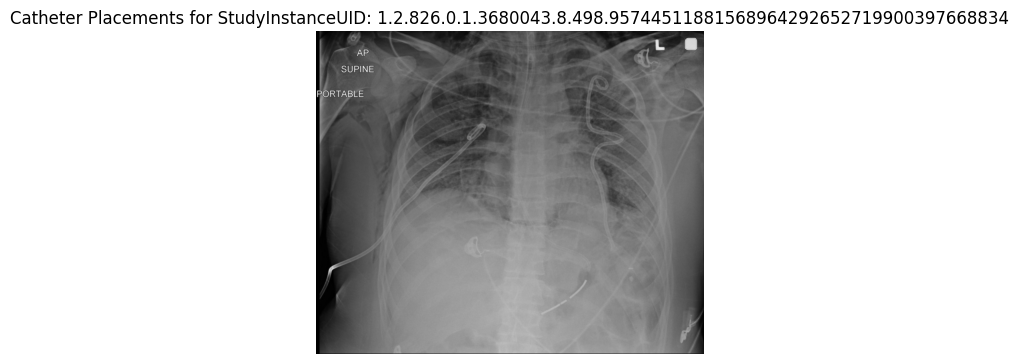

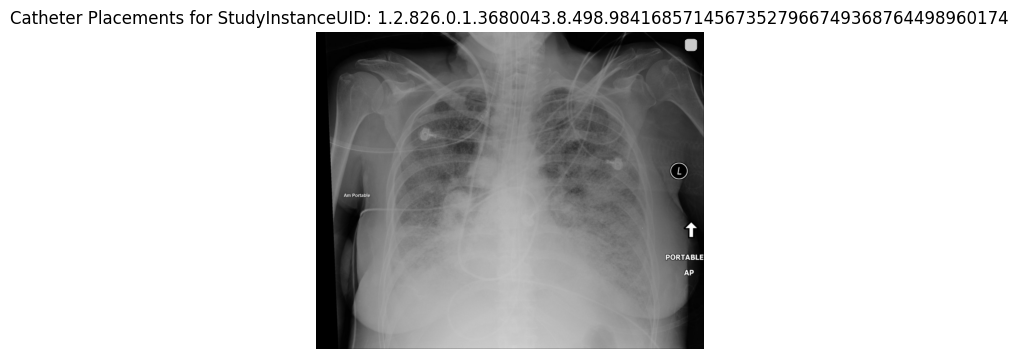

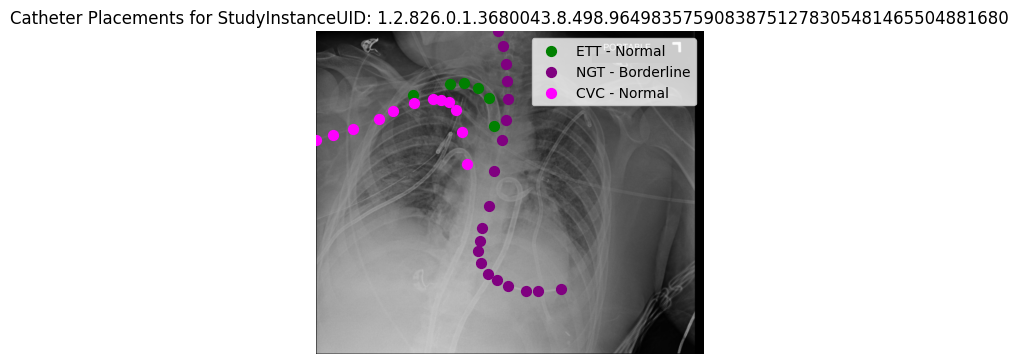

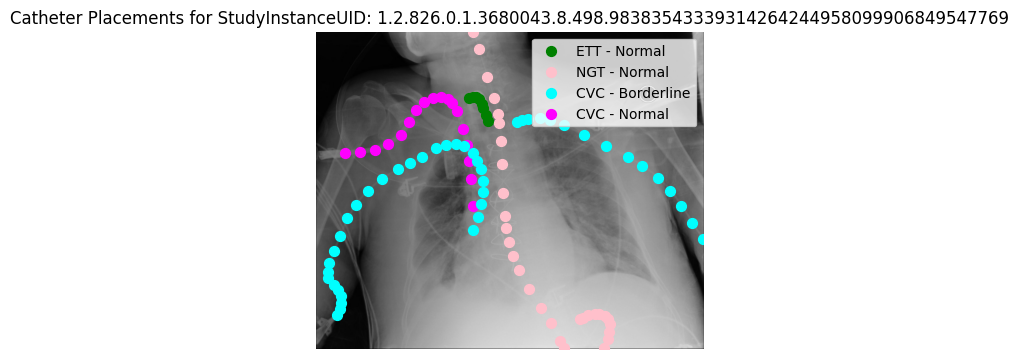

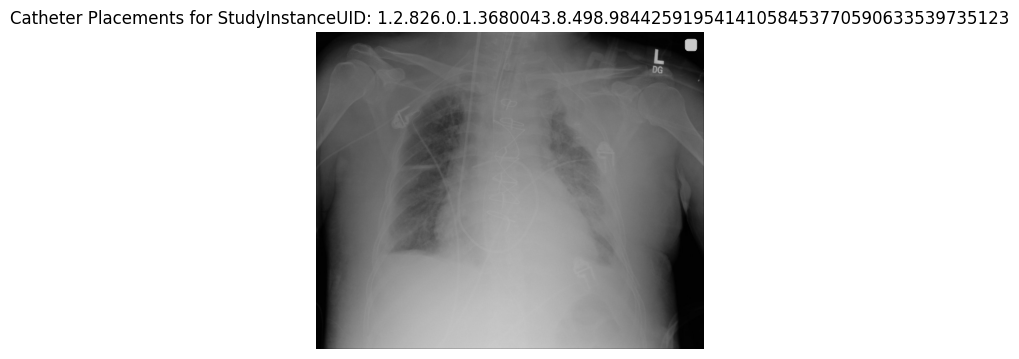

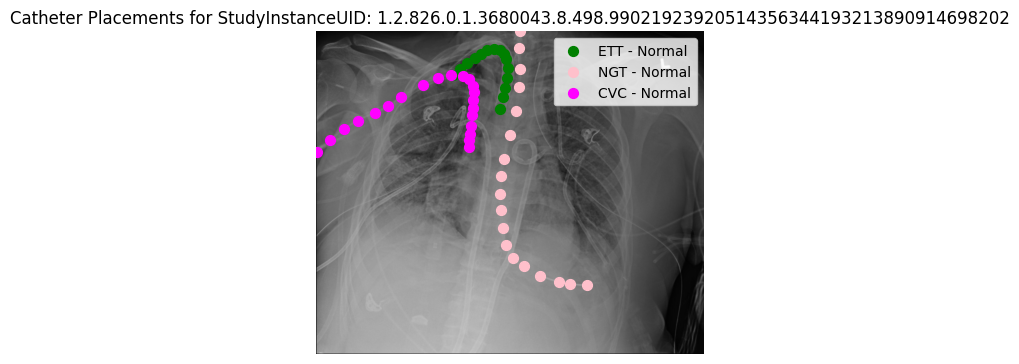

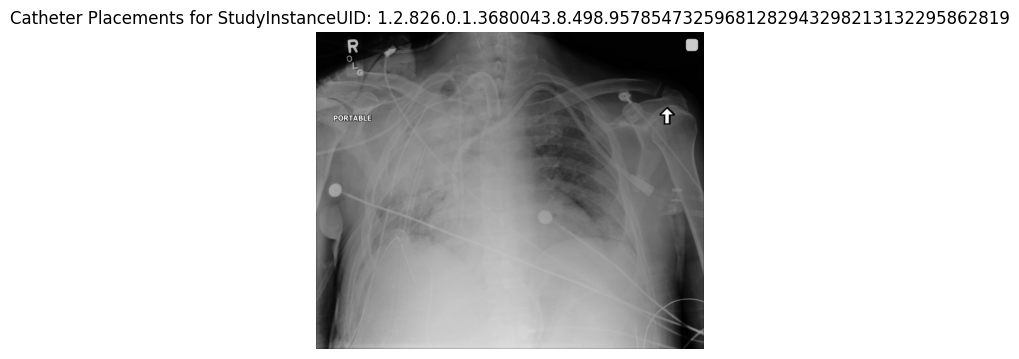

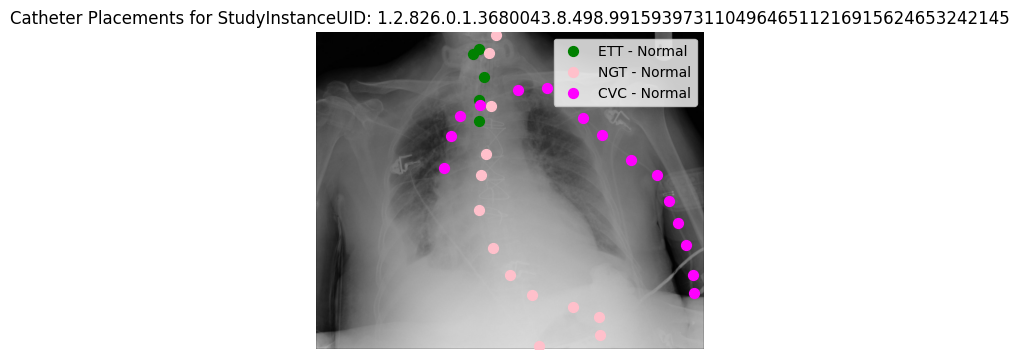

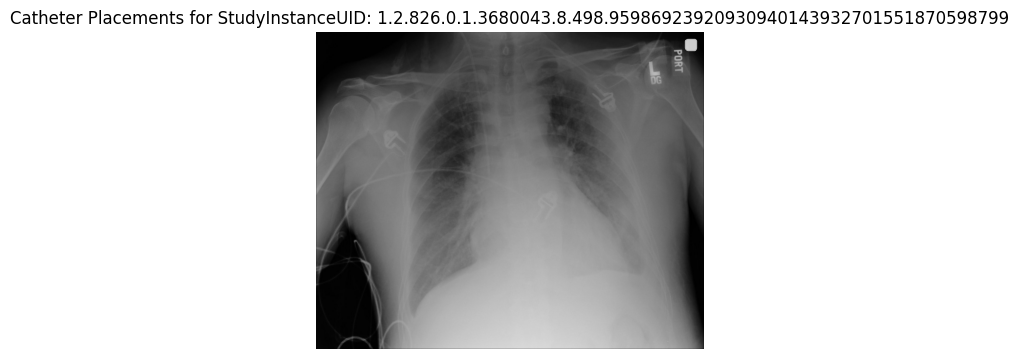

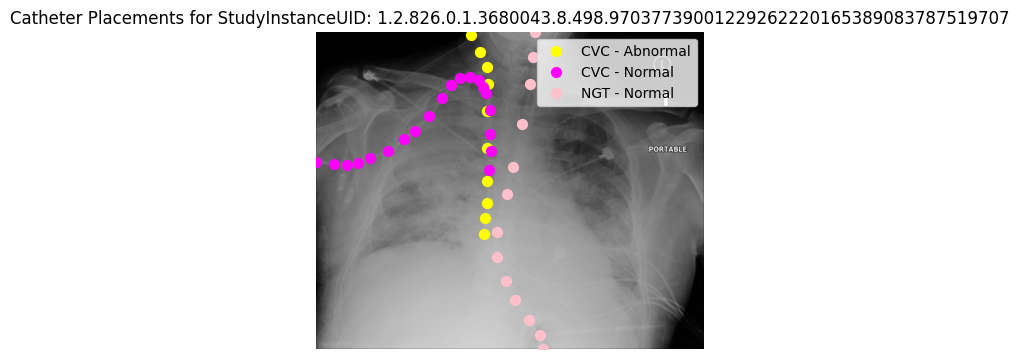

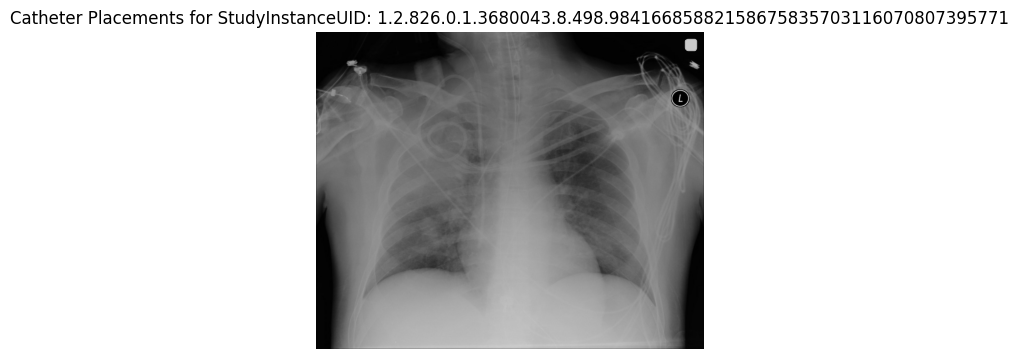

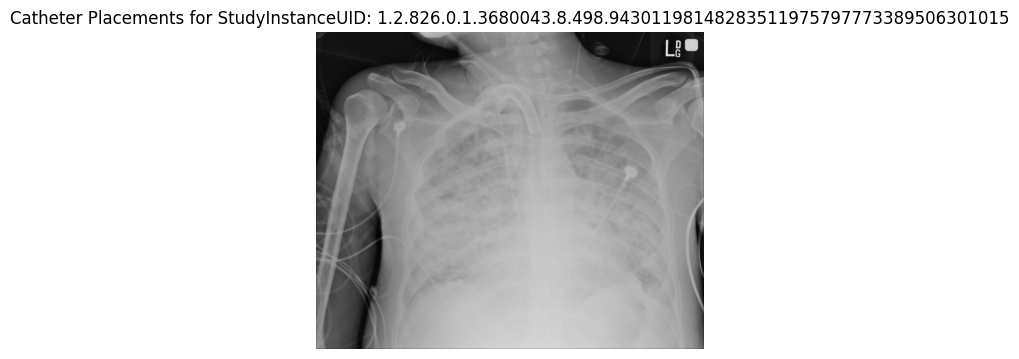

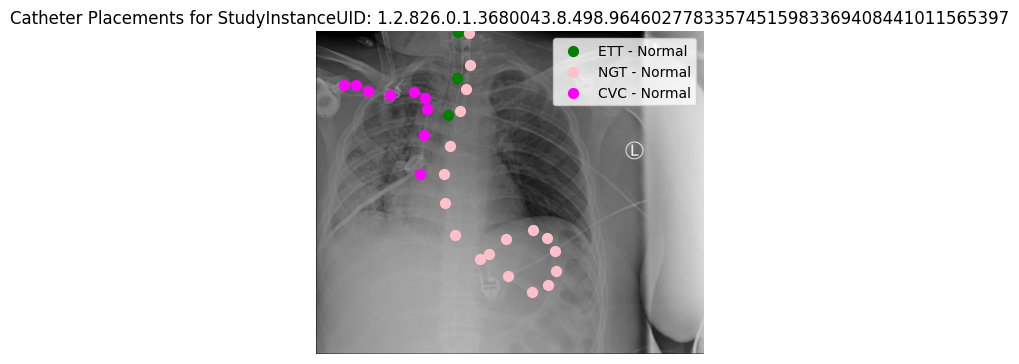

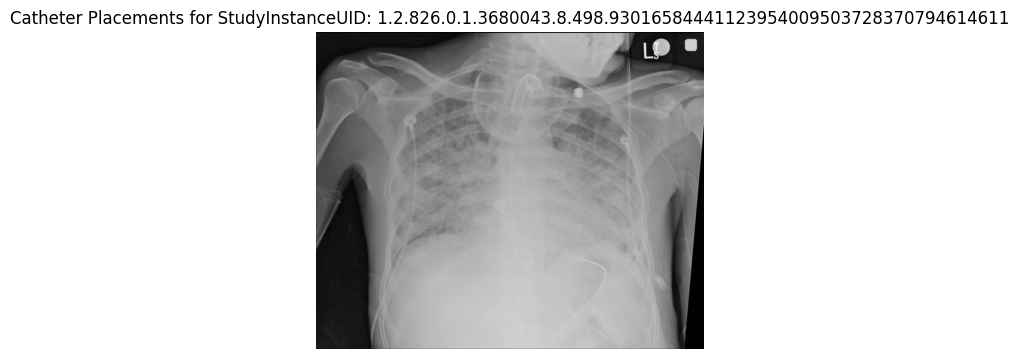

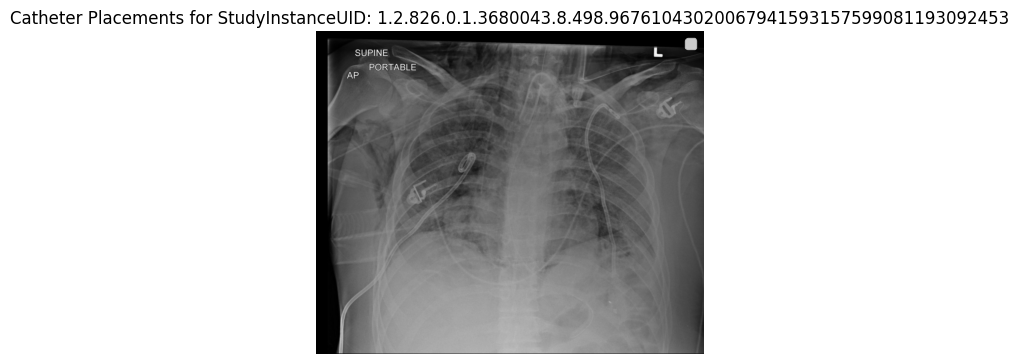

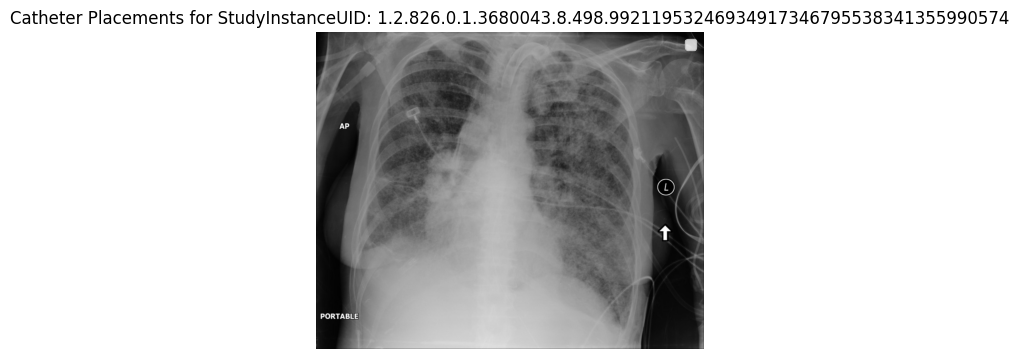

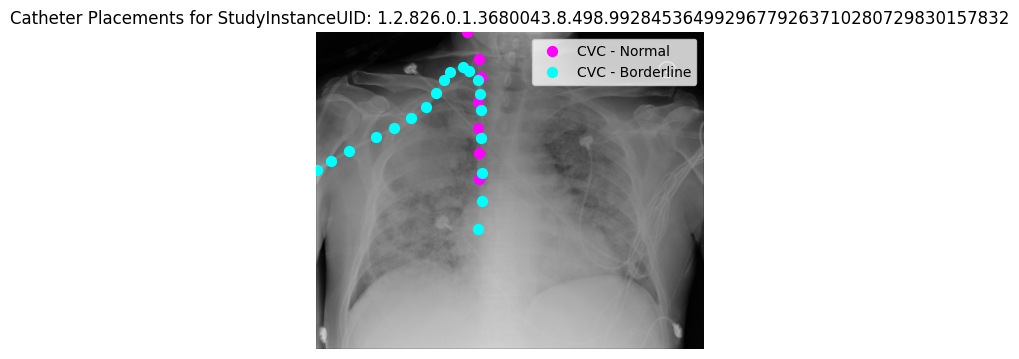

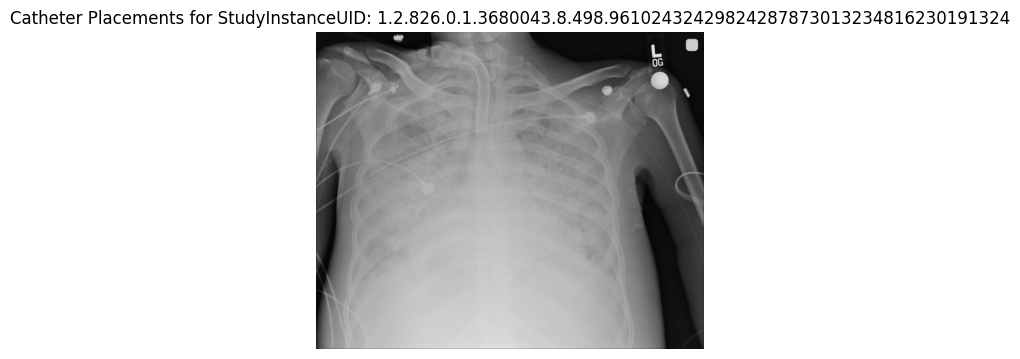

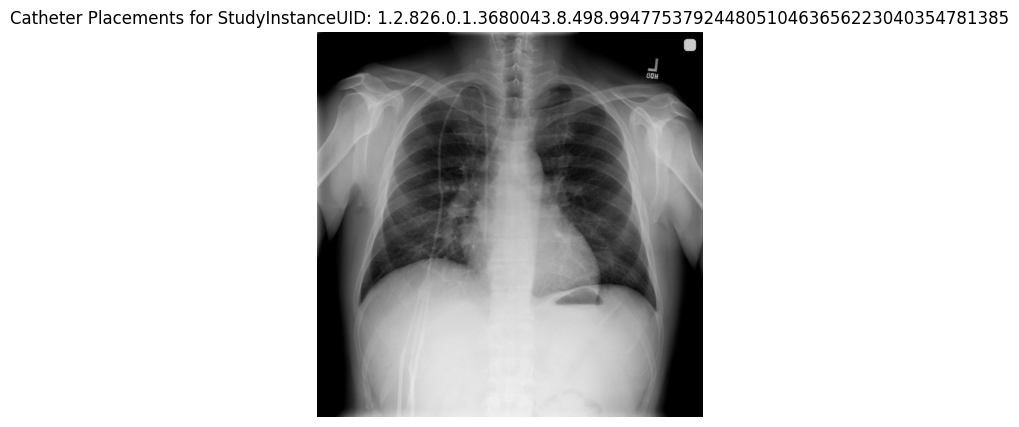

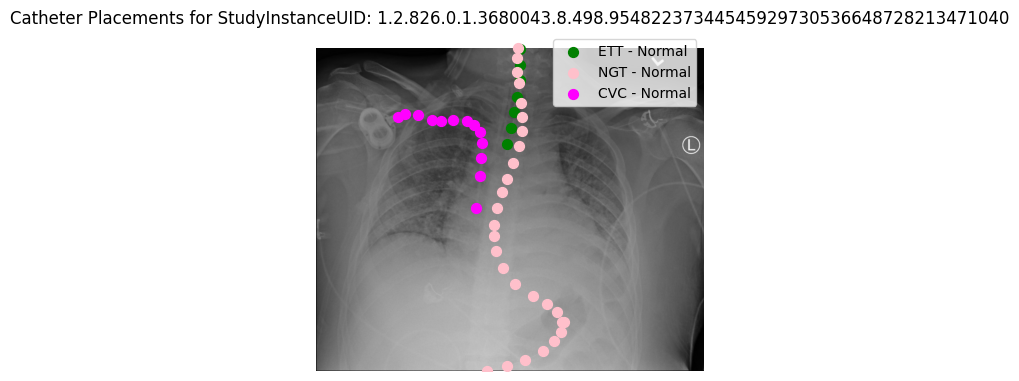

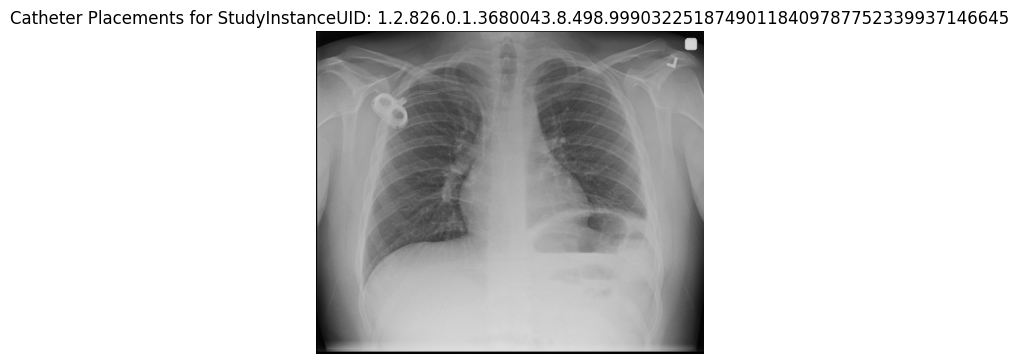

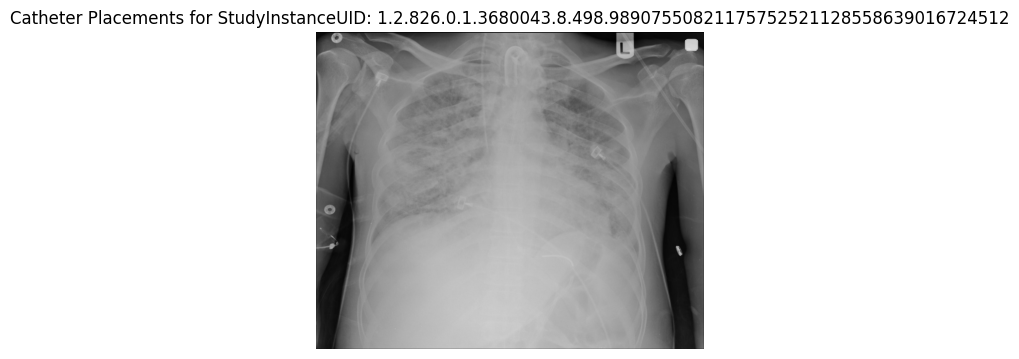

In [27]:
import cv2
import matplotlib.pyplot as plt

# Directory where your X-ray images are stored
image_dir = "/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train/"

# Define a color map for different catheter types
color_map = {
    'ETT - Abnormal': 'red',
    'ETT - Borderline': 'orange',
    'ETT - Normal': 'green',
    'NGT - Abnormal': 'blue',
    'NGT - Borderline': 'purple',
    'NGT - Incompletely Imaged': 'brown',
    'NGT - Normal': 'pink',
    'CVC - Abnormal': 'yellow',
    'CVC - Borderline': 'cyan',
    'CVC - Normal': 'magenta',
    'Swan Ganz Catheter Present': 'black'
}

# Loop through each unique StudyInstanceUID in the top 5 annotations
for study_uid in top_5_studies:
    # Load the image corresponding to the StudyInstanceUID using OpenCV
    image_path = f"{image_dir}{study_uid}.jpg"
    xray_image = cv2.imread(image_path)

    if xray_image is None:
      continue

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

    # Get annotations for this image
    annotations = top_5_annotations[top_5_annotations['StudyInstanceUID'] == study_uid]

    # Display the image with a smaller size
    fig, ax = plt.subplots(1, figsize=(5, 5))
    ax.imshow(xray_image_rgb)

    # Plot each coordinate point with its label
    for _, row in annotations.iterrows():
        coords = eval(row['data'])  # Convert string to list of coordinates if needed
        label = row['label']

        # Get the color for this catheter type
        color = color_map.get(label, 'red')  # Default to red if label not in map

        # Plot each point in the coordinate list
        for coord in coords:
            ax.scatter(coord[0], coord[1], color=color, s=50, label=label)

    # Ensure only one legend entry per catheter type
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    ax.set_title(f"Catheter Placements for StudyInstanceUID: {study_uid}")
    plt.axis('off')
    plt.show()
